### Задания к уроку 4

1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# расчетная вероятность выпадения числа на рулетке = 1/ 37 = 2.7%

# количество испытаний:

n=10000


d={}
for i in range(0,n):
    score=np.random.randint(0,37)
    if score in d:
        d[score]+=1/n
    else:
        d[score]=1/n
d
    

{10: 0.026899999999999893,
 32: 0.023699999999999912,
 7: 0.028399999999999884,
 11: 0.026699999999999894,
 28: 0.02889999999999988,
 12: 0.02879999999999988,
 14: 0.0256999999999999,
 18: 0.027899999999999887,
 34: 0.028199999999999885,
 31: 0.0256999999999999,
 27: 0.029499999999999877,
 5: 0.026699999999999894,
 0: 0.026699999999999894,
 23: 0.027999999999999886,
 24: 0.02759999999999989,
 8: 0.0257999999999999,
 2: 0.026999999999999892,
 36: 0.026899999999999893,
 15: 0.0258999999999999,
 20: 0.029299999999999878,
 25: 0.0256999999999999,
 17: 0.026799999999999893,
 26: 0.026299999999999896,
 30: 0.026599999999999895,
 1: 0.025199999999999903,
 13: 0.029499999999999877,
 21: 0.026699999999999894,
 33: 0.029899999999999875,
 29: 0.02889999999999988,
 35: 0.026299999999999896,
 22: 0.02739999999999989,
 9: 0.025299999999999902,
 4: 0.024699999999999906,
 19: 0.023399999999999914,
 3: 0.026799999999999893,
 6: 0.02899999999999988,
 16: 0.02719999999999989}

видим, что при большом числе испытаний средняя частота появления определенного значения на рулетке стремится к расчетной вероятности

### 2. 
1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

2) Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [3]:
# 1) проверим сумму полученных частот из 1-го примера

sum(d.values())

0.9999999999999961

видим, что сумма близка к 1. и появления значений от 0 до 36 образуют полную группу событий 

In [4]:
# 2) Сгенерируйте десять выборок случайных чисел х0, …, х9.

x_sum=[]
for i in range(0,10):
    x=np.random.randint(0,10,10)
    print(x)
    x_sum.append(np.sum(x))

x_sum


[8 3 5 8 4 9 7 6 8 1]
[3 0 8 1 2 1 4 3 4 2]
[0 7 7 4 1 8 6 1 7 8]
[8 6 1 5 4 8 8 9 1 0]
[9 9 0 2 9 7 7 8 8 2]
[3 7 7 6 5 3 2 1 8 2]
[5 9 1 1 2 8 9 6 3 0]
[0 9 3 9 8 6 2 9 3 8]
[0 7 2 3 6 9 7 8 6 7]
[7 4 0 7 3 8 8 7 4 4]


[59, 28, 49, 50, 61, 44, 44, 57, 55, 52]

(array([1., 0., 0., 0., 2., 0., 2., 1., 2., 2.]),
 array([28. , 31.3, 34.6, 37.9, 41.2, 44.5, 47.8, 51.1, 54.4, 57.7, 61. ]),
 <a list of 10 Patch objects>)

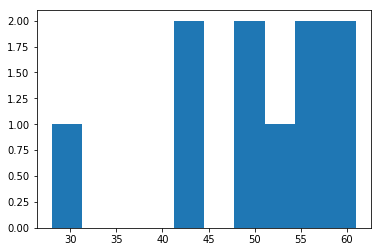

In [5]:
plt.hist(x_sum)

проверим при большом количестве выборок:

(array([   36.,   806.,  4802., 15191., 27056., 31367., 15146.,  4787.,
          764.,    45.]),
 array([ 9. , 16.2, 23.4, 30.6, 37.8, 45. , 52.2, 59.4, 66.6, 73.8, 81. ]),
 <a list of 10 Patch objects>)

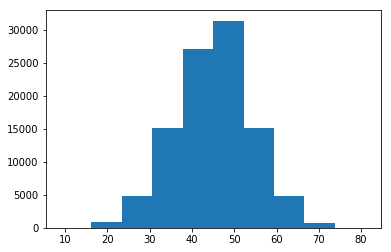

In [6]:
x_sum=[]
for i in range(0,100000):
    x=np.random.randint(0,10,10)
    #print(x)
    x_sum.append(np.sum(x))

plt.hist(x_sum)

видим, что раcпределение стремится к нормальному в соответсвии с центраьной предельной теоремой

### 3.
1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.

2) Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.


1) 
для предыдущей задачи сравним вероятность, того, что в выборке будет ровно 2 9-ки опытным путем, и проверим значение по формуле Бернулли

In [7]:
two_nines=0
for i in range(0,100000):
    x=np.random.randint(0,10,10)
    #print(x)
    if list(x).count(9)==2:
        two_nines=two_nines+1


two_nines    

19328

In [8]:
# частота выпадения только 2х девяток

two_nines/n

1.9328

In [9]:
# по формуле Бернулии

# вероятность выпадения 2х девяток в одной выборке C_2_10*p^k*q^(n-k)

from math import factorial

p=1/10
q=(1-p)
C_2_10=factorial(10)/factorial(2)/factorial(10-2)
P_two_nines=C_2_10*p**2*q**8
P_two_nines


0.19371024450000007

т.е. частота, полученная опытным путем близка к вероятности, посчитанной по формуле Бернулли

2) посчитаем множители из формулы Бернулли для k=4 и n=20

In [10]:
k=4
n=20

p=1/n
q=(1-p)
C_k_n=factorial(n)/factorial(k)/factorial(n-k)
P_4_nines=C_k_n*p**k*q**(n-k)
P_4_nines

0.013327585685111273

### 4. 
Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [11]:
# напишем функцию для сочетаний

def Combinations(k,n):
    return factorial(n)/factorial(k)/factorial(n-k)

print(Combinations(2,10))
print(Combinations(3,40))
print(Combinations(3,4))
print(Combinations(2,4))


45.0
9879.999999999998
4.0
6.0


In [12]:
# напишем функцию для размещений

def Arrangements(k,n):
    return factorial(n)/factorial(n-k)

print(Arrangements(2,10))
print(Arrangements(3,40))
print(Arrangements(3,4))
print(Arrangements(2,4))
print(Arrangements(4,4))

90.0
59280.0
24.0
12.0
24.0


### 5. 
Дополните код расчетом коэффициента корреляции x и y по формуле


Возьмем 2 вектора x и ax+b:

In [13]:
x=np.random.rand(50)
a=0.2
b=(1-a)*np.random.rand(50)
y=a*x+b
print(np.round(x,2))
print(np.round(y,2))

[0.25 0.57 0.41 0.62 0.56 0.96 0.22 0.18 0.26 0.57 0.62 0.67 0.87 0.43
 0.54 0.92 0.55 0.92 0.08 0.24 0.37 0.38 0.51 0.13 0.45 0.98 0.77 0.32
 0.03 0.75 0.46 0.43 0.56 0.65 0.53 0.95 0.84 0.42 0.09 0.9  0.85 0.85
 0.07 0.16 0.73 0.71 0.23 0.68 0.33 0.55]
[0.64 0.25 0.42 0.82 0.27 0.81 0.84 0.15 0.19 0.9  0.72 0.39 0.71 0.44
 0.19 0.61 0.68 0.61 0.64 0.14 0.21 0.83 0.64 0.53 0.27 0.97 0.68 0.84
 0.76 0.4  0.77 0.68 0.89 0.29 0.55 0.97 0.91 0.87 0.3  0.89 0.71 0.97
 0.45 0.21 0.81 0.57 0.37 0.58 0.68 0.45]


In [14]:
x_mean=x.sum()/x.shape[0]
x_mean

0.5225593600764159

In [15]:
y_mean=y.sum()/y.shape[0]
y_mean

0.5885538373984869

In [16]:
R=((x-x_mean)*(y-y_mean)).sum()/np.sqrt(((x-x_mean)**2).sum()*((y-y_mean)**2).sum())

R

0.42431146763205996

In [17]:
np.corrcoef(x,y)

array([[1.        , 0.42431147],
       [0.42431147, 1.        ]])

видим, что расчетный коэффициент равен значению, полченноу встроенным методом np.corrcoef(x,y)